# Multiple plots on a page and plot positioning 

# Examples of multiple plots on a page and plot positioning in cf-plot

To make multiple plots on a page we use the commands:

`cfp.gopen` - open a plot page

`cfp.gpos` - position plots


`cfp.gclose` - close a plot page


`cfp.gopen` takes the following parameters:
rows=1 - number of plot rows on the page
columns=1 - number of plot columns on the page
file='python.png' - default file name
orientation='landscape' - orientation - also takes ‘portrait’

For page size and margins use:
figsize=[11.7, 8.3] - figure size in inches
left=0.12 - left margin in normalised coordinates
right=0.92 - right margin in normalised coordinates
top=0.92 - top margin in normalised coordinates
bottom=0.08 - bottom margin in normalised coordinates
wspace=0.2 - width reserved for blank space between subplots
hspace=0.2 - height reserved for white space between subplots

`cfp.gpos` selects the position as for Matplotlib with position 1 being 
top left.  

In [1]:
# Plot images inline - not needed in Python
%matplotlib inline

/home/david/cfplot/cfplot/cfplot.py:5538: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  projection=proj)


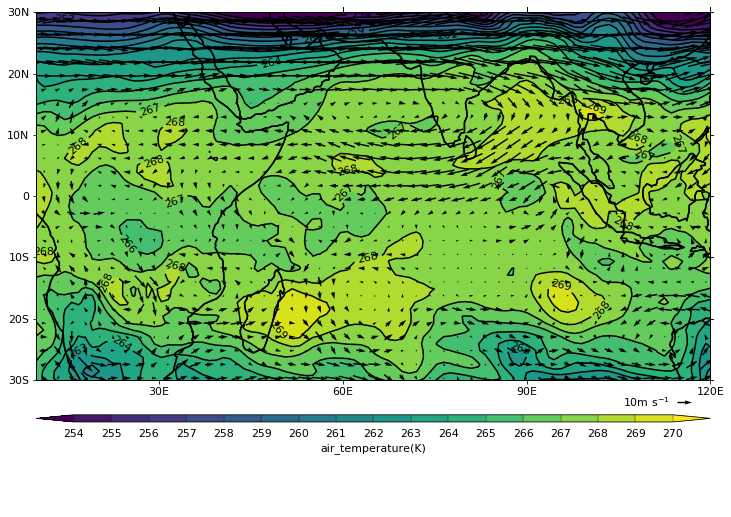

In [2]:
# Making overlaying plots
# In this case we will make a vector plot overlaying a contour plot

import cf
import cfplot as cfp

f = cf.read('../ncas_data/data1.nc')

u = f.select('eastward_wind')[0].subspace(pressure=500)
v = f.select('northward_wind')[0].subspace(pressure=500)
t = f.select('air_temperature')[0].subspace(pressure=500)

cfp.gopen()
cfp.mapset(lonmin=10, lonmax=120, latmin=-30, latmax=30)
cfp.levs(min=254, max=270, step=1)
cfp.con(t)
cfp.vect(u=u, v=v, key_length=10, scale=50, stride=2)
cfp.gclose()

In [3]:
# In this example we will make four plots on a page 
# Reset the levels and map region
cfp.levs()
cfp.mapset()

/home/david/cfplot/cfplot/cfplot.py:3059: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plotvars.rows, plotvars.columns, pos)


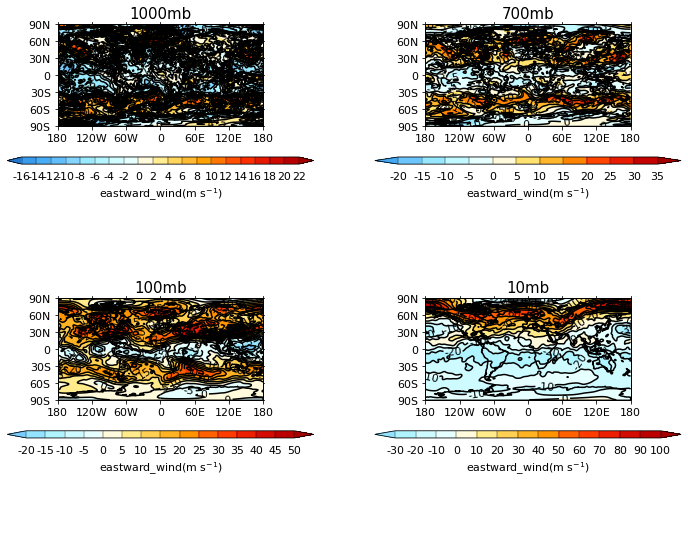

In [4]:
import cf, cfplot as cfp
f = cf.read('../ncas_data/data1.nc', select='eastward_wind')[0]

cfp.gopen(rows=2, columns=2)
cfp.gpos(1)
cfp.con(f.subspace(pressure=1000), title='1000mb')
cfp.gpos(2)
cfp.con(f.subspace(pressure=700), title='700mb')
cfp.gpos(3)
cfp.con(f.subspace(pressure=100), title='100mb')
cfp.gpos(4)
cfp.con(f.subspace(pressure=10), title='10mb')
cfp.gclose()

# cfp.gpos uses the default Matplotlib plot positioning on the page:
# 1 2
# 3 4

In [5]:
f

<CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>

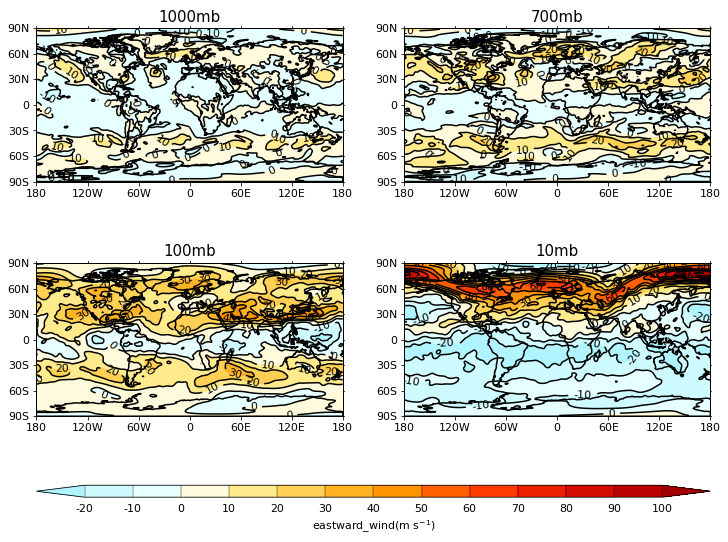

In [6]:
# We can select the same levels for all the plots and make a common colorbar as below

cfp.levs(-20, 100, 10)
cfp.gopen(rows=2, columns=2, bottom=0.2)
cfp.gpos(1)
cfp.con(f.subspace(pressure=1000), title='1000mb', colorbar=None)
cfp.gpos(2)
cfp.con(f.subspace(pressure=700), title='700mb', colorbar=None)
cfp.gpos(3)
cfp.con(f.subspace(pressure=100), title='100mb', colorbar=None)
cfp.gpos(4)
cfp.con(f.subspace(pressure=10), title='10mb', colorbar_position=[0.12, 0.1, 0.80, 0.02],
        colorbar_orientation='horizontal')
cfp.gclose()

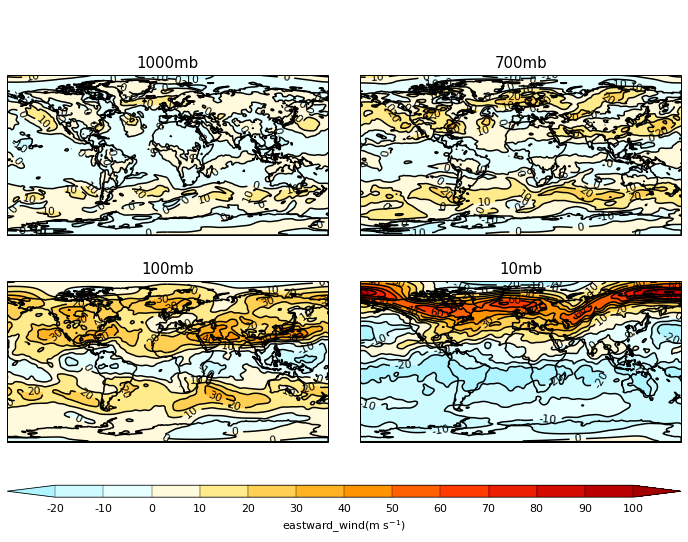

In [7]:
# We can turn off axis labeling as we have drawn continents and also reduce the space 
# inbetween the plots to make the final plot less cluttered.

cfp.levs(-20, 100, 10)
cfp.gopen(rows=2, columns=2, wspace=0.1, hspace=-0.3)
cfp.gpos(1)
cfp.con(f.subspace(pressure=1000), title='1000mb', colorbar=None, axes=None)
cfp.gpos(2)
cfp.con(f.subspace(pressure=700), title='700mb', colorbar=None, axes=None)
cfp.gpos(3)
cfp.con(f.subspace(pressure=100), title='100mb', colorbar=None, axes=None)
cfp.gpos(4)
cfp.con(f.subspace(pressure=10), title='10mb', colorbar_position=[0.12, 0.1, 0.80, 0.02],
        colorbar_orientation='horizontal', axes=None)
cfp.gclose()

